In [5]:
#Ejercicio 1


import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn import tree

df = pd.read_csv('ames_housing.csv').drop('Unnamed: 0', axis=1)
df.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


In [9]:
#Ejercicio 2
#Importe de archivos serialzados de desafio guiado

read_X_training = pickle.load(open('ia-X_train.sav','rb'))
read_y_training = pickle.load(open('ia-y_train.sav','rb'))
read_X_testing = pickle.load(open('ia-X_test.sav','rb'))
read_y_testing = pickle.load(open('ia-y_test.sav','rb'))
read_model_DTR=pickle.load(open('ignacio_araneda.sav','rb'))

def report_cont_metrics(model, y_true, X_test):
    fit_model = model.predict(X_test)
    print("MSE: ",mean_squared_error(y_true, fit_model))
    print("MAE: ",median_absolute_error(y_true, fit_model))
    print("R2: ", r2_score(y_true, fit_model))

In [8]:
#Ejercicio 3
#Creacion de modelo random forest

model_RF = RandomForestRegressor(random_state=17892).fit(read_X_training,read_y_training)
#Reporte de metricas Random Forest
report_cont_metrics(model_RF, read_y_testing,read_X_testing)

MSE:  986095057.1733956
MAE:  12685.589999999997
R2:  0.8264980727860053


In [10]:
#Reporte de metricas modelo Decision Tree Regresor
report_cont_metrics(read_model_DTR,read_y_testing,read_X_testing)

MSE:  1470231360.2549715
MAE:  15648.399999999994
R2:  0.741315025768519


Se observa que todas las metricas salen con mejores valores en el metodo random Forest en relacion a Decision Tree Regresor.

In [43]:
#Ejercicio 4
#Evaluar desempeno del modelo random forest usando distintos hiperparametros(GridSearch)
n_estimator=[i for i in range(20,1000,50)]

oob_none,oob_log,oob_sqrt=[],[],[]


#Caso None
for i in n_estimator:
    randomForest_None=RandomForestRegressor(n_estimators=i,max_features=None,oob_score=True, random_state=17892).fit(read_X_training,read_y_training)

    randomForest_log=RandomForestRegressor(n_estimators=i,max_features='log2',warm_start=True,oob_score=True, random_state=17892).fit(read_X_training,read_y_training)

    randomForest_sqrt=RandomForestRegressor(n_estimators=i,max_features='sqrt',warm_start=True,oob_score=True, random_state=17892).fit(read_X_training,read_y_training)

    oob_none.append(randomForest_None.oob_score_)
    oob_log.append(randomForest_log.oob_score_)
    oob_sqrt.append(randomForest_sqrt.oob_score_)




#Caso Log
#Caso sqrt

In [44]:
print(oob_log)

[0.8396695412563917, 0.84877613535389, 0.8546652565372866, 0.8555301140898572, 0.8581338254321856, 0.8584943209893556, 0.8590982984318978, 0.8590546218471568, 0.8597629227338274, 0.8604101016542548, 0.8596274260712635, 0.860226265830009, 0.8613385719261766, 0.8611476463303336, 0.8607270495392834, 0.8608784952452054, 0.8611990321519188, 0.8612301972128644, 0.8613323158590959, 0.861373710518892]


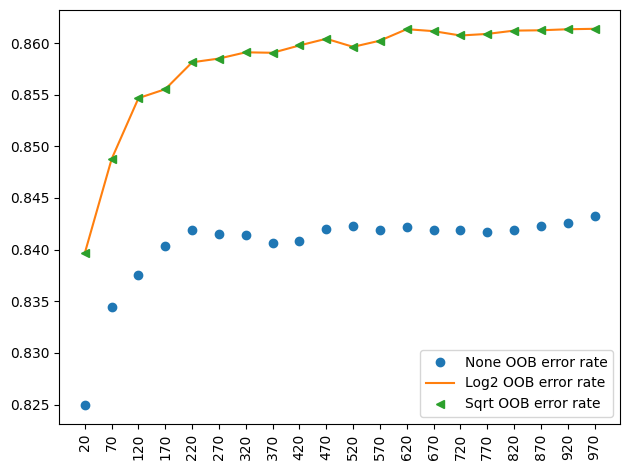

In [45]:
plt.plot(oob_none,'o',label='None OOB error rate')
plt.plot(oob_log,'-',label='Log2 OOB error rate')
plt.plot(oob_sqrt,'<',label='Sqrt OOB error rate')
plt.xticks(range(len(n_estimator)),n_estimator,rotation=90)
plt.tight_layout()
plt.legend()

In [48]:
#Ejercicio 5

best_RF=RandomForestRegressor(n_estimators=970,max_features='log2',warm_start=True, random_state=17892).fit(read_X_training,read_y_training)

report_cont_metrics(best_RF,read_y_testing,read_X_testing)

MSE:  923886493.2736394
MAE:  12788.513402061828
R2:  0.8374435750956519


Los resultados son similares al modelo random forest donde no se incluyeron hiperparametros. El R2 es levemente mejor. 